# Importing required libraries

In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

# Downloading NTLK resources

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Loading dataset

In [3]:
df=pd.read_csv(r"C:\Users\asus\OneDrive\Desktop\Proxenix\IMDB Dataset.csv")
print("Sample Data:")
display(df.head())

Sample Data:


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


# Preprocessing

In [4]:
stop_words=set(stopwords.words('english'))
ps=PorterStemmer()

In [5]:
def preprocess_text(text):
    tokens=text.lower().split()
    filtered=[ps.stem(word) for word in tokens if word.isalnum() and word not in stop_words]
    return ' '.join(filtered)

In [6]:
df['clean_review']=df['review'].apply(preprocess_text)

# WordClouds

In [7]:
positive_text=' '.join(df[df['sentiment']=='positive']['clean_review'])
negative_text=' '.join(df[df['sentiment']=='negative']['clean_review'])

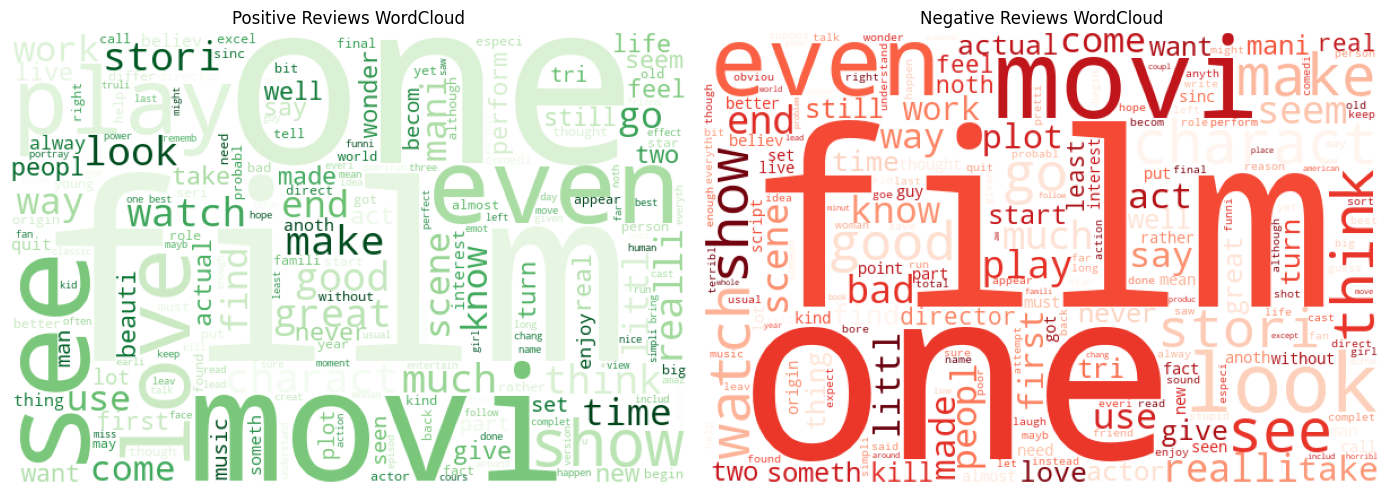

In [8]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.imshow(WordCloud(width=600, height=400, background_color='white', colormap='Greens').generate(positive_text))
plt.title("Positive Reviews WordCloud")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(WordCloud(width=600, height=400, background_color='white', colormap='Reds').generate(negative_text))
plt.title("Negative Reviews WordCloud")
plt.axis('off')
plt.tight_layout()
plt.show()

# TF-IDF Vectorization

In [9]:
vectorizer=TfidfVectorizer(max_features=1000)
X=vectorizer.fit_transform(df['clean_review']).toarray()
y=df['sentiment'].map({'positive':1, 'negative':0})

# Train-Test Split

In [10]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=42)

# Defining models

In [11]:
models={"Naive Bayes":MultinomialNB(), "Logistic Regression":LogisticRegression(max_iter=200),"Linear SVM":LinearSVC()}

# Training and evaluating models

In [12]:
results=[]
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    acc=accuracy_score(y_test, y_pred)
    f1=f1_score(y_test, y_pred)
    print(f"\n{name} Results")
    print("Accuracy:", round(acc, 4))
    print("F1 Score:", round(f1, 4))
    print(classification_report(y_test, y_pred, target_names=["Negative", "Positive"]))
    results.append({"Model": name, "Accuracy": acc, "F1 Score": f1})


Naive Bayes Results
Accuracy: 0.8221
F1 Score: 0.8257
              precision    recall  f1-score   support

    Negative       0.83      0.81      0.82      7411
    Positive       0.82      0.83      0.83      7589

    accuracy                           0.82     15000
   macro avg       0.82      0.82      0.82     15000
weighted avg       0.82      0.82      0.82     15000


Logistic Regression Results
Accuracy: 0.8475
F1 Score: 0.851
              precision    recall  f1-score   support

    Negative       0.85      0.83      0.84      7411
    Positive       0.84      0.86      0.85      7589

    accuracy                           0.85     15000
   macro avg       0.85      0.85      0.85     15000
weighted avg       0.85      0.85      0.85     15000


Linear SVM Results
Accuracy: 0.8465
F1 Score: 0.8498
              precision    recall  f1-score   support

    Negative       0.85      0.83      0.84      7411
    Positive       0.84      0.86      0.85      7589

    accurac

# Model comparison plot

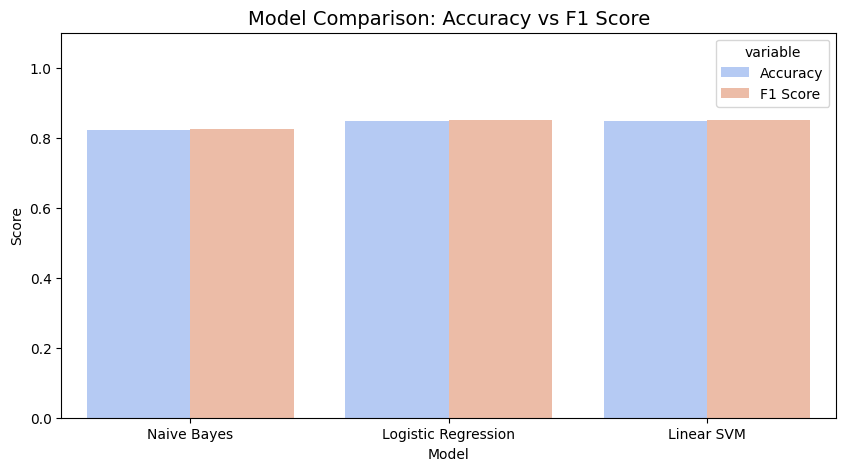

In [13]:
results_df=pd.DataFrame(results)
plt.figure(figsize=(10,5))
sns.barplot(data=results_df.melt(id_vars='Model'), x='Model', y='value', hue='variable', palette='coolwarm')
plt.title("Model Comparison: Accuracy vs F1 Score", fontsize=14)
plt.ylabel("Score")
plt.xlabel("Model")
plt.ylim(0, 1.1)
plt.grid(axis='y',linestyle=' ', alpha=0.5)
plt.show()

# Confusion matrix for best model

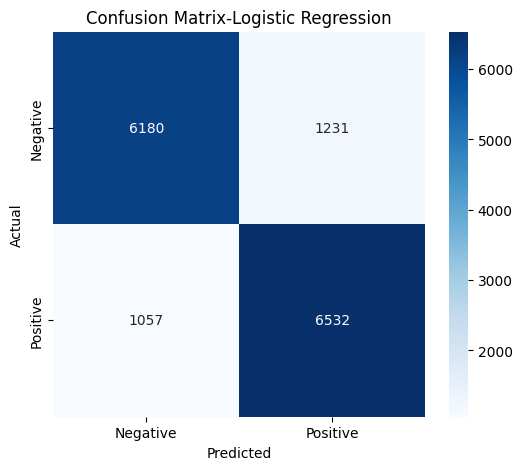

In [14]:
best_model=models["Logistic Regression"]
y_pred_best=best_model.predict(X_test)
cm=confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title("Confusion Matrix-Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Predicting custom review

In [15]:
def predict_sentiment(text, model=best_model):
    processed=preprocess_text(text)
    vector=vectorizer.transform([processed]).toarray()
    prediction=model.predict(vector)
    return "Positive" if prediction[0]==1 else "Negative"

# Test example

In [16]:
sample_review="The direction was top-notch and the performances were heart-touching!"
print(f"Custom Review: {sample_review}")
print("Predicted Sentiment:", predict_sentiment(sample_review))

Custom Review: The direction was top-notch and the performances were heart-touching!
Predicted Sentiment: Positive
